<a href="https://colab.research.google.com/github/Vishal8500/Anomaly-Based-Intrusion-Detection-System/blob/main/Intrusion_Detection_Benchmarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Machine Learning Project**

In [ ]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=a7428da9eae2cefb880e53163ee8c148605a2e1777233fe65b8e48e9214f8e29
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [ ]:
# Data Handling
import pandas as pd
import numpy as np

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Model Selection and Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, adjusted_mutual_info_score

# Supervised Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Neural Networks with Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

# Unsupervised Models
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from minisom import MiniSom

# Visualization
import matplotlib.pyplot as plt
from collections import Counter

import time




Decision Tree




In [ ]:
# Load the dataset
data = pd.read_csv('/content/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')

# Step 1: Data Preparation
# Separate features and target (label)
X = data.drop('Label', axis=1, errors='ignore')
y = data['Label']

# Step 2: Handle infinite and missing values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

# Step 3: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)



In [ ]:
# Step 5: Initialize and Train the Decision Tree Classifier with specified settings
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=None, class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = dt_model.predict(X_test)

# Step 7: Evaluation - Classification Report
print("Classification Report for Decision Tree:\n")
print(classification_report(y_test, y_pred))

# Step 8: Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")


Classification Report for Decision Tree:

                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00     50442
  Web Attack � Brute Force       0.75      0.78      0.77       459
Web Attack � Sql Injection       1.00      0.86      0.92         7
          Web Attack � XSS       0.44      0.37      0.40       202

                  accuracy                           1.00     51110
                 macro avg       0.80      0.75      0.77     51110
              weighted avg       1.00      1.00      1.00     51110

Accuracy Score: 0.9955


Random Forest


In [ ]:
# Step 5: Initialize and Train the Random Forest Classifier with specified settings
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = rf_model.predict(X_test)

# Step 7: Evaluation - Classification Report
print("Classification Report for Random Forest:\n")
print(classification_report(y_test, y_pred))

# Step 8: Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

Classification Report for Random Forest:

                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00     50442
  Web Attack � Brute Force       0.78      0.75      0.76       459
Web Attack � Sql Injection       1.00      0.29      0.44         7
          Web Attack � XSS       0.46      0.46      0.46       202

                  accuracy                           1.00     51110
                 macro avg       0.81      0.62      0.67     51110
              weighted avg       1.00      1.00      1.00     51110

Accuracy Score: 0.9955


 Naive Bayes Classifier

In [ ]:
# Step 5: Initialize and Train the Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = nb_model.predict(X_test)

# Step 7: Evaluation - Classification Report
print("Classification Report for Naive Bayes:\n")
print(classification_report(y_test, y_pred))

# Step 8: Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

Classification Report for Naive Bayes:

                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00     50442
  Web Attack � Brute Force       0.15      0.09      0.12       459
Web Attack � Sql Injection       0.11      1.00      0.20         7
          Web Attack � XSS       0.32      0.90      0.48       202

                  accuracy                           0.99     51110
                 macro avg       0.40      0.75      0.45     51110
              weighted avg       0.99      0.99      0.99     51110

Accuracy Score: 0.9866


ANN

In [ ]:
# Step 3: Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)  # Convert to categorical for multiclass classification

# Step 4: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.3, random_state=42)

# Step 6: Build the ANN model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(y_categorical.shape[1], activation='softmax'))  # Output layer

# Step 7: Compile the model with the specified solver, loss function, and metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 8: Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Step 9: Make Predictions
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_test_labels = np.argmax(y_test, axis=1)  # Convert categorical test labels back to label indices

# Step 10: Evaluation - Classification Report
print("Classification Report for ANN:\n")
print(classification_report(y_test_labels, y_pred))

# Step 11: Accuracy Score
accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2982/2982 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9868 - loss: 0.0607 - val_accuracy: 0.9929 - val_loss: 0.0175
Epoch 2/100
2982/2982 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9922 - loss: 0.0187 - val_accuracy: 0.9937 - val_loss: 0.0153
Epoch 3/100
2982/2982 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9924 - loss: 0.0182 - val_accuracy: 0.9935 - val_loss: 0.0151
Epoch 4/100
2982/2982 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9927 - loss: 0.0172 - val_accuracy: 0.9936 - val_loss: 0.0147
Epoch 5/100
2982/2982 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9930 - loss: 0.0168 - val_accuracy: 0.9919 - val_loss: 0.0182
Epoch 6/100
2982/2982 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9930 - loss: 0.0165 - val_accuracy: 0.9937 - val_loss: 0.0144
Epoch 7/100
2982/2982 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9928 - loss: 0.0164 - val_accuracy: 0.9936 - val_loss: 0.0144
Epoch 8/100
2982/2982 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9936 - l

KNN

In [ ]:
# Step 5: Initialize and Train the KNN Classifier with k=3
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = knn_model.predict(X_test)

# Step 7: Evaluation - Classification Report
print("Classification Report for KNN with k=3:\n")
print(classification_report(y_test, y_pred))

# Step 8: Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

Classification Report for KNN with k=3:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50442
           1       0.74      0.79      0.76       459
           2       0.67      0.29      0.40         7
           3       0.44      0.38      0.41       202

   micro avg       1.00      1.00      1.00     51110
   macro avg       0.71      0.61      0.64     51110
weighted avg       1.00      1.00      1.00     51110
 samples avg       1.00      1.00      1.00     51110

Accuracy Score: 0.9953


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**CNN**

In [ ]:
# Step 1: Encode target labels
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

# Step 2: Separate features and target
X = data.drop('Label', axis=1)
y = data['Label']

# Step 3: Handle infinite and missing values
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Option 1: Drop rows with NaNs
X.dropna(inplace=True)
y = y[X.index]  # Align the target variable after dropping rows

# Option 2: Alternatively, fill NaNs with the mean of each column
# X.fillna(X.mean(), inplace=True)

# Step 4: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Reshape the data to fit CNN input (samples, timesteps, features)
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Step 6: Convert labels to categorical format
y_categorical = to_categorical(y)

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_categorical, test_size=0.2, random_state=42)

# Building the CNN Model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),

    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_categorical.shape[1], activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
4256/4256 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9872 - loss: 0.0489 - val_accuracy: 0.9912 - val_loss: 0.0221
Epoch 2/100
4256/4256 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9908 - loss: 0.0226 - val_accuracy: 0.9925 - val_loss: 0.0194
Epoch 3/100
4256/4256 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9915 - loss: 0.0209 - val_accuracy: 0.9933 - val_loss: 0.0195
Epoch 4/100
4256/4256 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9920 - loss: 0.0197 - val_accuracy: 0.9936 - val_loss: 0.0181
Epoch 5/100
4256/4256 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9920 - loss: 0.0186 - val_accuracy: 0.9935 - val_loss: 0.0170
Epoch 6/100
4256/4256 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9923 - loss: 0.0187 - val_accuracy: 0.9936 - val_loss: 0.0172
Epoch 7/100
4256/4256 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9925 - loss: 0.0178 - val_accuracy: 0.9939 - val_loss: 0.0169
Epoch 8/100
4256/4256 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9922 -

In [ ]:
# Convert label_encoder.classes_ to strings if necessary
target_names = [str(label) for label in label_encoder.classes_]

# Generate the classification report
report = classification_report(y_test_classes, y_pred_classes, target_names=target_names, zero_division=0)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33603
           1       0.63      0.99      0.77       324
           2       0.00      0.00      0.00         6
           3       1.00      0.04      0.08       114

    accuracy                           0.99     34047
   macro avg       0.66      0.51      0.46     34047
weighted avg       1.00      0.99      0.99     34047



**SVM**

Classification Report:
                             precision    recall  f1-score   support

                    BENIGN       1.00      0.97      0.98     33610
  Web Attack � Brute Force       0.34      0.10      0.15       316
Web Attack � Sql Injection       0.01      1.00      0.02         5
          Web Attack � XSS       0.15      0.98      0.26       143

                  accuracy                           0.96     34074
                 macro avg       0.38      0.76      0.35     34074
              weighted avg       0.99      0.96      0.97     34074



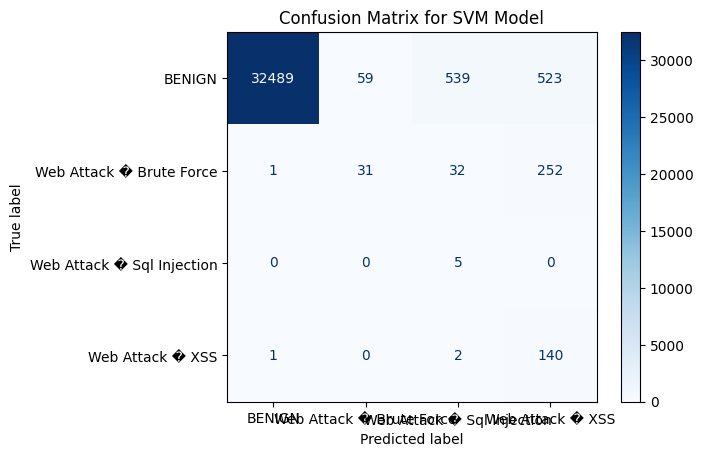

In [ ]:

# Step 1: Encode target labels
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

# Step 2: Separate features and target
X = data.drop('Label', axis=1)
y = data['Label']

# Step 3: Handle infinite and missing values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)  # Fill NaNs with the mean of each column

# Step 4: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Use PCA for dimensionality reduction to speed up SVM training
pca = PCA(n_components=20)  # Choose a reasonable number of components
X_pca = pca.fit_transform(X_scaled)

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Building the SVM Model
svm_model = SVC(kernel='rbf', max_iter=-1, class_weight='balanced')
svm_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = svm_model.predict(X_test)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Plotting the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label_encoder.classes_, cmap="Blues")
plt.title("Confusion Matrix for SVM Model")
plt.show()


**K MEANS**

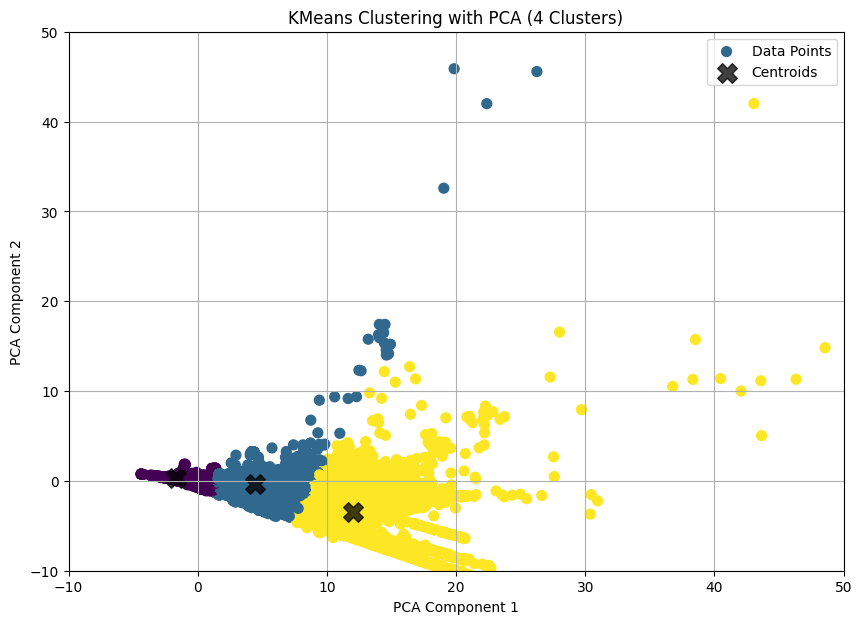

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                            precision    recall  f1-score   support

                    BENIGN       0.99      1.00      0.99    168186
  Web Attack � Brute Force       0.00      0.00      0.00      1507
Web Attack � Sql Injection       0.00      0.00      0.00        21
          Web Attack � XSS       0.00      0.00      0.00       652

                  accuracy                           0.99    170366
                 macro avg       0.25      0.25      0.25    170366
              weighted avg       0.97      0.99      0.98    170366



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from collections import Counter

# Load the dataset
data = pd.read_csv('/content/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')

# Step 1: Data Preparation
# Separate features and target, and remove the target column for unsupervised learning
X = data.drop('Label', axis=1, errors='ignore')

# Step 2: Handle infinite and missing values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

# Step 3: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Dimensionality reduction with PCA for visualization
pca = PCA(n_components=2)  # Reduce to 2 components for a 2D plot
X_pca = pca.fit_transform(X_scaled)

# Step 5: Apply KMeans Clustering with n_clusters=4 and max_iter=300
kmeans = KMeans(n_clusters=4, max_iter=300, random_state=42)  # Change n_clusters and max_iter as needed
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

# Step 6: Plot the Clusters with Centroids
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', marker='o', s=50, label='Data Points')

# Mark centroids with larger black 'X' markers
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.75, marker='X', label='Centroids')

# Customize the plot
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering with PCA (4 Clusters)')
plt.legend()

# Adjust zoom if data is densely packed
plt.xlim(-10, 50)  # Set custom x-axis limits
plt.ylim(-10, 50)  # Set custom y-axis limits
plt.grid(True)

# Show the plot
plt.show()

# Step 7: Generate Classification Report
if 'Label' in data.columns:
    # Create a mapping of clusters to the actual labels
    cluster_labels = np.empty_like(y_kmeans, dtype=object)  # Use dtype=object for categorical labels
    for i in range(4):  # Adjusting to 4 clusters
        mask = (y_kmeans == i)
        if np.any(mask):  # Check if there are any points in the cluster
            labels = data['Label'][mask]  # Get true labels for the cluster
            most_common_label = Counter(labels).most_common(1)[0][0]  # Find the most common label
            cluster_labels[mask] = most_common_label  # Assign the most common label to the cluster

    # Generate the classification report
    print(classification_report(data['Label'], cluster_labels))
else:
    print("No label column found in the dataset for comparison.")


**EM**

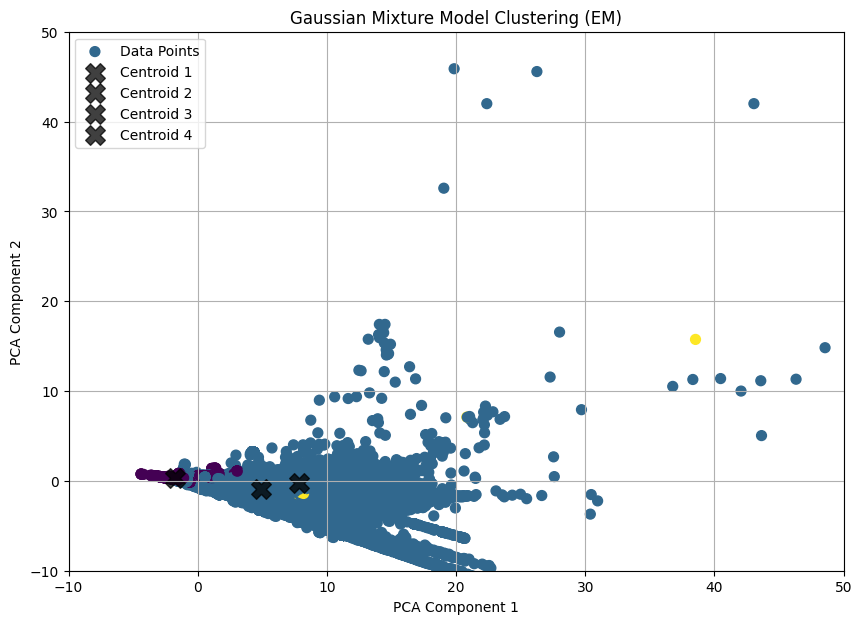

In [ ]:
# Step 1: Data Preparation
# Separate features and target, and remove the target column for unsupervised learning
X = data.drop('Label', axis=1, errors='ignore')

# Step 2: Handle infinite and missing values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

# Step 3: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Dimensionality reduction with PCA for visualization
pca = PCA(n_components=2)  # Reduce to 2 components for a 2D plot
X_pca = pca.fit_transform(X_scaled)

# Step 5: Apply Gaussian Mixture Model (GMM) using EM algorithm
n_components = 4  # Number of clusters/components
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X_scaled)  # Fit the model on scaled data
y_gmm = gmm.predict(X_scaled)  # Predict the cluster labels

# Step 6: Plot the Clusters with Centroids
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_gmm, cmap='viridis', marker='o', s=50, label='Data Points')

# Since GMM doesn't provide centroids directly, we can calculate means of clusters
for i in range(n_components):
    cluster_points = X_pca[y_gmm == i]
    if len(cluster_points) > 0:
        cluster_center = np.mean(cluster_points, axis=0)
        plt.scatter(cluster_center[0], cluster_center[1], c='black', s=200, alpha=0.75, marker='X', label=f'Centroid {i+1}')

# Customize the plot
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Gaussian Mixture Model Clustering (EM)')
plt.legend()

# Adjust zoom if data is densely packed
plt.xlim(-10, 50)  # Set custom x-axis limits
plt.ylim(-10, 50)  # Set custom y-axis limits
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
# Step 7: Generate Classification Report
if 'Label' in data.columns:
    # Encode 'Label' column if it is categorical
    label_encoder = LabelEncoder()
    true_labels = label_encoder.fit_transform(data['Label'])

    # Map cluster numbers to the most common true labels within each cluster
    cluster_labels = np.empty_like(y_gmm)  # Initialize an array with the same shape as y_gmm
    for i in range(n_components):  # Iterate over the number of clusters
        mask = (y_gmm == i)
        if np.any(mask):  # Check if there are points in the cluster
            # Get the true labels for the current cluster
            labels_in_cluster = true_labels[mask]
            # Find the most common true label in the cluster
            most_common_label = Counter(labels_in_cluster).most_common(1)[0][0]
            # Assign the most common label to the entire cluster
            cluster_labels[mask] = most_common_label

    # Convert label names to strings to avoid TypeError
    target_names = [str(label) for label in label_encoder.classes_]

    # Generate the classification report
    print(classification_report(true_labels, cluster_labels, target_names=target_names))
else:
    print("No label column found in the dataset for comparison.")

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    168186
           1       0.00      0.00      0.00      1507
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00       652

    accuracy                           0.99    170366
   macro avg       0.25      0.25      0.25    170366
weighted avg       0.97      0.99      0.98    170366



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**SOM**

In [ ]:
# Step 3: Create and Train the SOM
som_size = (10, 10)  # 10x10 grid
som = MiniSom(som_size[0], som_size[1], X_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.train(X_scaled, num_iteration=1000)

# Step 4: Map data points to winning nodes
win_indices = np.array([som.winner(x) for x in X_scaled])

# Step 5: Create a mapping of winning nodes to true labels
win_map = {}
for i in range(len(X_scaled)):
    w = tuple(win_indices[i])  # Convert to tuple for use as a dictionary key
    if w not in win_map:
        win_map[w] = []
    win_map[w].append(y.iloc[i])  # Append the true label to the winning node

# Step 6: Assign the most common label to each winning node
node_labels = {}
for w in win_map:
    labels, counts = np.unique(win_map[w], return_counts=True)  # Get unique labels and their counts
    most_common_label = labels[np.argmax(counts)]  # Get the label with the highest count
    node_labels[w] = most_common_label  # Assign it to the winning node

# Step 7: Assign predicted labels to each data point based on winning nodes
predicted_labels = np.array([node_labels[tuple(w)] for w in win_indices])

# Step 8: Generate the classification report
print(classification_report(y, predicted_labels))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                            precision    recall  f1-score   support

                    BENIGN       0.99      1.00      0.99    168186
  Web Attack � Brute Force       0.00      0.00      0.00      1507
Web Attack � Sql Injection       0.00      0.00      0.00        21
          Web Attack � XSS       0.00      0.00      0.00       652

                  accuracy                           0.99    170366
                 macro avg       0.25      0.25      0.25    170366
              weighted avg       0.97      0.99      0.98    170366



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report for Decision Tree:
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00     50442
  Web Attack � Brute Force       0.76      0.77      0.76       459
Web Attack � Sql Injection       0.86      0.86      0.86         7
          Web Attack � XSS       0.42      0.37      0.40       202

                  accuracy                           1.00     51110
                 macro avg       0.76      0.75      0.75     51110
              weighted avg       1.00      1.00      1.00     51110


Classification Report for Random Forest:
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00     50442
  Web Attack � Brute Force       0.78      0.75      0.76       459
Web Attack � Sql Injection       1.00      0.29      0.44         7
          Web Attack � XSS       0.46      0.46      0.46       202

                  accuracy 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1598/1598 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1598/1598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

Classification Report for KMeans:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     50442
           1       0.00      0.00      0.00       459
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00       202

    accuracy                           0.99     51110
   macro avg       0.25      0.25      0.25     51110
weighted avg       0.97      0.99      0.98     51110



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report for Gaussian Mixture (EM):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     50442
           1       0.00      0.00      0.00       459
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00       202

    accuracy                           0.99     51110
   macro avg       0.25      0.25      0.25     51110
weighted avg       0.97      0.99      0.98     51110



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report for Self-Organizing Map (SOM):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     50442
           1       0.00      0.00      0.00       459
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00       202

    accuracy                           0.99     51110
   macro avg       0.25      0.25      0.25     51110
weighted avg       0.97      0.99      0.98     51110

Benchmark Results:
                        Model  Training Time (s)  Testing Time (s)
0              Decision Tree           2.401273          0.012931
1              Random Forest          13.159497          0.245557
2                Naive Bayes           0.175942          0.099997
3                  KNN (k=3)           0.013962         57.915131
4                        SVM         578.556685         35.895575
5                        ANN         747.237870          2.618021
6                        CNN 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


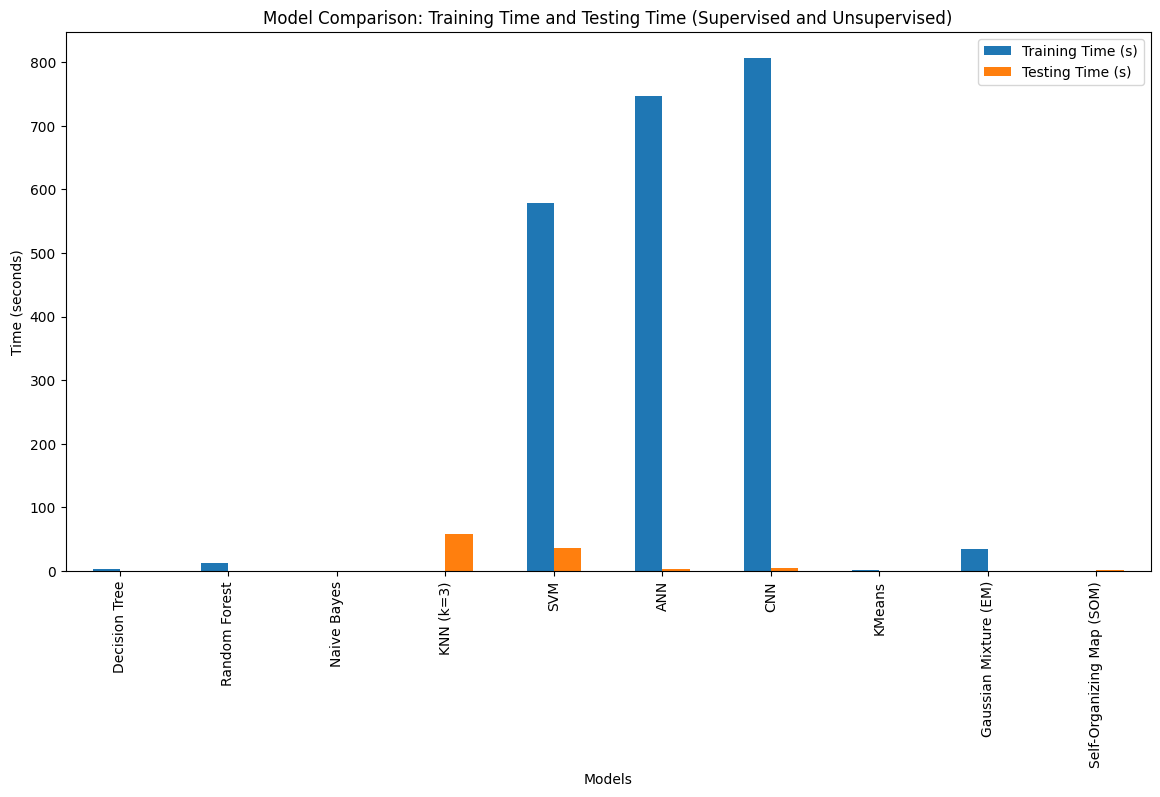

In [ ]:
# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Dictionary to store model performance and timing
performance = {
    "Model": [],
    "Training Time (s)": [],
    "Testing Time (s)": []
}

# Function to evaluate supervised models
def evaluate_supervised_model(model, name):
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()

    start_test = time.time()
    y_pred = model.predict(X_test)
    end_test = time.time()

    accuracy = accuracy_score(y_test, y_pred)
    performance["Model"].append(name)
    performance["Training Time (s)"].append(end_train - start_train)
    performance["Testing Time (s)"].append(end_test - start_test)

    # Convert label names to strings
    target_names = [str(label) for label in label_encoder.classes_]

    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred, target_names=target_names))

def evaluate_unsupervised_model(model, name, X_train, X_test, y_test):
    # Measure training time
    start_train = time.time()

    # Check if the model is SOM (which uses train())
    if name == "Self-Organizing Map (SOM)":
        model.train(X_train, num_iteration=100)  # SOM-specific training method
    else:
        model.fit(X_train)  # Other models (e.g., KMeans) use fit()

    end_train = time.time()

    # Measure testing/prediction time
    start_test = time.time()

    if name == "Self-Organizing Map (SOM)":
        # SOM uses 'win_map' or 'predict' method to assign clusters
        y_pred = np.array([model.winner(x)[0] for x in X_test])  # Get the cluster index for each point
    else:
        y_pred = model.predict(X_test)  # For other models like KMeans, use predict()

    end_test = time.time()

    # Map each cluster to the most frequent true label
    cluster_labels = np.empty_like(y_pred)
    for cluster in np.unique(y_pred):
        mask = (y_pred == cluster)
        if np.any(mask):  # Check if there are any points in the cluster
            labels = y_test[mask]  # Get the true labels for the points in the cluster
            most_common_label = Counter(labels).most_common(1)[0][0]  # Find the most common label
            cluster_labels[mask] = most_common_label  # Assign this label to the cluster

    # Ensure the labels are of the same type (convert y_test to numeric)
    if y_test.dtype.kind in 'UO':  # If y_test contains strings
        label_encoder = LabelEncoder()
        y_test_numeric = label_encoder.fit_transform(y_test)
    else:  # If y_test is already numeric
        y_test_numeric = y_test.astype(int)

    # Generate the classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test_numeric, cluster_labels))

    # Record performance metrics
    performance["Model"].append(name)
    performance["Training Time (s)"].append(end_train - start_train)
    performance["Testing Time (s)"].append(end_test - start_test)


# Supervised Models
# 1. Decision Tree
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=None, class_weight='balanced')
evaluate_supervised_model(dt_model, "Decision Tree")

# 2. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, class_weight='balanced', random_state=42)
evaluate_supervised_model(rf_model, "Random Forest")

# 3. Naive Bayes
nb_model = GaussianNB()
evaluate_supervised_model(nb_model, "Naive Bayes")

# 4. K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)
evaluate_supervised_model(knn_model, "KNN (k=3)")

# 5. Support Vector Machine
svm_model = SVC(kernel='rbf', class_weight='balanced', max_iter=-1)
evaluate_supervised_model(svm_model, "SVM")

# 6. ANN
ann_model = Sequential()
ann_model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(y_categorical.shape[1], activation='softmax'))
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start_train = time.time()
ann_model.fit(X_train, to_categorical(y_train), epochs=100, batch_size=32, verbose=0)
end_train = time.time()

start_test = time.time()
ann_pred = np.argmax(ann_model.predict(X_test), axis=1)
end_test = time.time()

performance["Model"].append("ANN")
performance["Training Time (s)"].append(end_train - start_train)
performance["Testing Time (s)"].append(end_test - start_test)

# 7. CNN
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

cnn_model = Sequential()
cnn_model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(y_categorical.shape[1], activation='softmax'))
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start_train = time.time()
cnn_model.fit(X_train_cnn, to_categorical(y_train), epochs=100, batch_size=32, verbose=0)
end_train = time.time()

start_test = time.time()
cnn_pred = np.argmax(cnn_model.predict(X_test_cnn), axis=1)
end_test = time.time()

performance["Model"].append("CNN")
performance["Training Time (s)"].append(end_train - start_train)
performance["Testing Time (s)"].append(end_test - start_test)

#KMeans
kmeans = KMeans(n_clusters=len(np.unique(y_train)), random_state=42)
kmeans.fit(X_train)

#EM
gmm = GaussianMixture(n_components=len(np.unique(y_train)), random_state=42)
gmm.fit(X_train)

#Self-Organizing Map (SOM)
som = MiniSom(x=10, y=10, input_len=X_train.shape[1], sigma=1.0, learning_rate=0.5, random_seed=42)
som.train_random(X_train, num_iteration=100)

# Now call the evaluate_unsupervised_model function
evaluate_unsupervised_model(kmeans, "KMeans", X_train, X_test, y_test)
evaluate_unsupervised_model(gmm, "Gaussian Mixture (EM)", X_train, X_test, y_test)
evaluate_unsupervised_model(som, "Self-Organizing Map (SOM)", X_train, X_test, y_test)

# Plotting Benchmarking Results (Training and Testing Time Only)
benchmark_df = pd.DataFrame(performance)
print("Benchmark Results:\n", benchmark_df)

# Plot Training and Testing Time for each Model
fig, ax = plt.subplots(figsize=(14, 7))
benchmark_df.plot(x="Model", y=["Training Time (s)", "Testing Time (s)"], kind="bar", ax=ax)
plt.title("Model Comparison: Training Time and Testing Time (Supervised and Unsupervised)")
plt.ylabel("Time (seconds)")
plt.xlabel("Models")
plt.show()


In [ ]:
# Example function to map K-Means or SOM labels to actual labels
def map_kmeans_or_som_to_labels(predicted_labels):
    # Assuming you have a predefined mapping of cluster to attack labels
    mapping = {
        0: 'BENIGN',
        1: 'BRUTE FORCE',
        2: 'SQL INJECTION',
        3: 'XSS',

    }
    return [mapping[label] for label in predicted_labels]


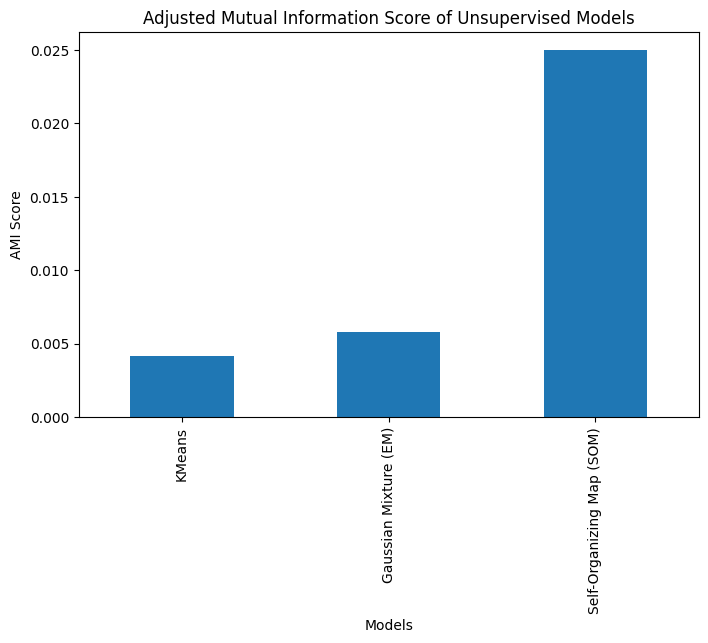

In [ ]:
# Unsupervised Model Scores (AMI)
unsupervised_scores = {
    "KMeans": kmeans_ami,
    "Gaussian Mixture (EM)": gmm_ami,
    "Self-Organizing Map (SOM)": som_ami
}

# Convert to DataFrame for easy plotting
unsupervised_df = pd.DataFrame.from_dict(unsupervised_scores, orient='index', columns=["AMI Score"])

# Plotting AMI Scores for Unsupervised Models
unsupervised_df.plot(kind='bar', figsize=(8, 5), legend=False)
plt.title("Adjusted Mutual Information Score of Unsupervised Models")
plt.ylabel("AMI Score")
plt.xlabel("Models")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


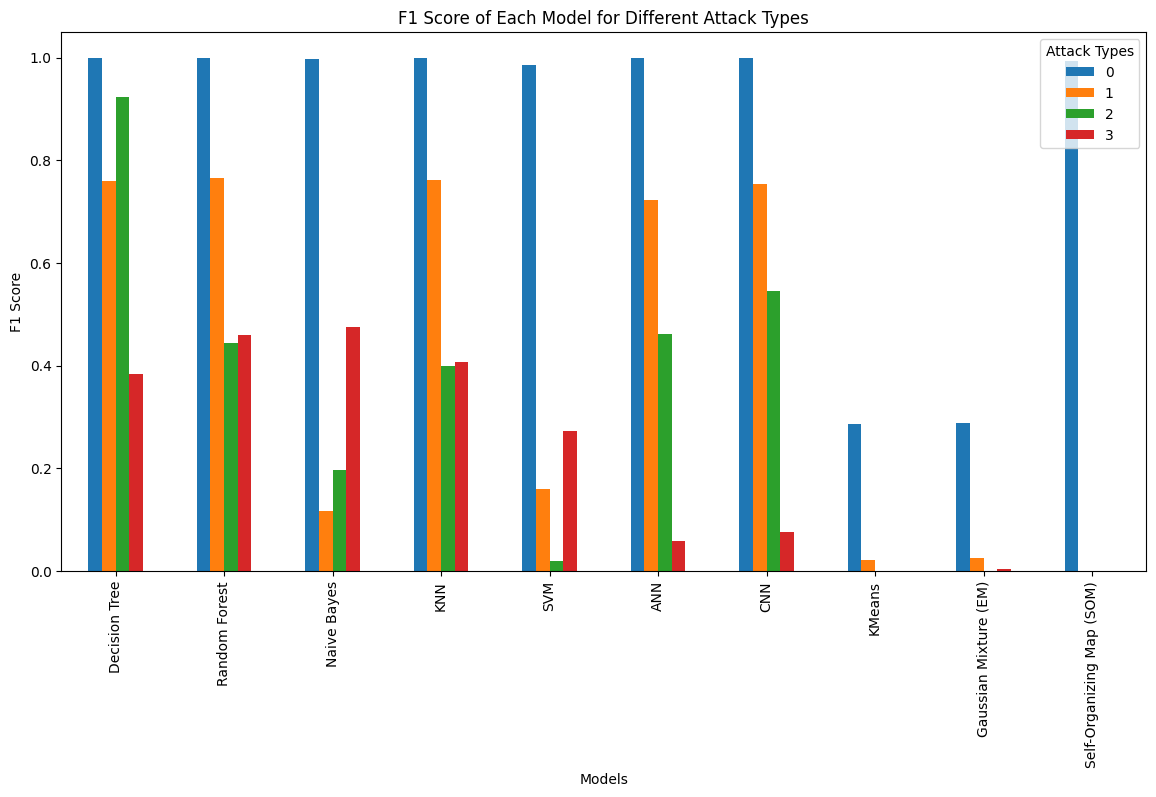

In [ ]:
# Assuming y_test contains the target labels
attack_labels = np.unique(y_test)  # Get unique labels from y_test
y_test_str = y_test.astype(str)
# Adding F1-scores for supervised models
attack_df = pd.DataFrame(columns=attack_labels)

# Loop for each model to get their predictions and reports
for name, model in [("Decision Tree", dt_model), ("Random Forest", rf_model), ("Naive Bayes", nb_model), ("KNN", knn_model), ("SVM", svm_model)]:
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=attack_labels, output_dict=True)
    attack_df.loc[name] = [report[label]['f1-score'] for label in attack_labels]

# Adding F1-scores for ANN
ann_pred_report = classification_report(y_test, ann_pred, target_names=attack_labels, output_dict=True)
attack_df.loc["ANN"] = [ann_pred_report[label]['f1-score'] for label in attack_labels]

# Adding F1-scores for CNN
cnn_pred_report = classification_report(y_test, cnn_pred, target_names=attack_labels, output_dict=True)
attack_df.loc["CNN"] = [cnn_pred_report[label]['f1-score'] for label in attack_labels]

# Adding F1-scores for Unsupervised Models
# K-Means
kmeans_pred = kmeans.predict(X_test)
kmeans_report = classification_report(y_test, kmeans_pred, target_names=attack_labels, output_dict=True)
attack_df.loc["KMeans"] = [kmeans_report[label]['f1-score'] for label in attack_labels]

# Gaussian Mixture Model (EM)
gmm_pred = gmm.predict(X_test)
gmm_report = classification_report(y_test, gmm_pred, target_names=attack_labels, output_dict=True)
attack_df.loc["Gaussian Mixture (EM)"] = [gmm_report[label]['f1-score'] for label in attack_labels]

# SOM: After predicting with SOM, check the keys in the classification report
# Step 1: Create and Train the SOM on the training data
som = MiniSom(x=10, y=10, input_len=X_train.shape[1], sigma=1.0, learning_rate=0.5, random_seed=42)
som.train_random(X_train, num_iteration=100)

# Step 2: Map data points to winning nodes for the test data
win_indices = np.array([som.winner(x) for x in X_test])

# Step 3: Create a mapping of winning nodes to true labels
win_map = {}
for i in range(len(X_test)):
    w = tuple(win_indices[i])  # Convert to tuple for use as a dictionary key
    if w not in win_map:
        win_map[w] = []
    win_map[w].append(y_test[i])  # Use y_test[i] instead of y_test.iloc[i]

# Step 4: Assign the most common label to each winning node
node_labels = {}
for w in win_map:
    labels, counts = np.unique(win_map[w], return_counts=True)  # Get unique labels and their counts
    most_common_label = labels[np.argmax(counts)]  # Get the label with the highest count
    node_labels[w] = most_common_label  # Assign it to the winning node

# Ensure both y_test and predicted_labels are of the same type (strings in this case)
predicted_labels_str = predicted_labels.astype(str)

# Now generate the classification report for the SOM model
som_report = classification_report(y_test_str, predicted_labels_str, target_names=attack_labels, output_dict=True, labels=attack_labels)

# Extract F1-scores and insert into the dataframe
attack_df.loc["Self-Organizing Map (SOM)"] = [som_report[label]['f1-score'] for label in attack_labels]

# Plotting F1 Scores for All Models
attack_df.plot(kind='bar', figsize=(14, 7))
plt.title("F1 Score of Each Model for Different Attack Types")
plt.ylabel("F1 Score")
plt.xlabel("Models")
plt.legend(title="Attack Types")
plt.show()
